# Multiple Linear Regression
A correlation can be viewed as a "Linear Regression" - how well one variable explains another. In this notebook, we will explore "Multiple Linear Regression" - a method to explore how a collection of variables explain the variability in another variable. 

#### Import the modules for this notebook

In [8]:
# import the os, numpy, matplotlib and statsmodels.api modules
import os
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Read in the data
Read in the temperature, wind, and chlorophyll-a concentration data.

In [9]:
# define a path to the timeseries folder
timeseries_folder = 'C:\\Users\\seamu\\ms274\\ms274_lab_13'

# define a time step to use for the timeseries (daily or monthly)
time_step = 'monthly'

sst_timeseries = np.genfromtxt(timeseries_folder+'\\'+'SST_'+time_step+'_timeseries.csv', delimiter=',')

# read in the wind timeseries
wind_timeseries = np.genfromtxt(timeseries_folder+'\\'+'Wind_'+time_step+'_timeseries.csv', delimiter=',')

# read in the chlorophyll timeseries
chl_timeseries = np.genfromtxt(timeseries_folder+'\\'+'Chlorophyll_'+time_step+'_timeseries.csv', delimiter=',')

# print the sizes of each time series
print('SST Shape', np.shape(sst_timeseries))
print('Wind Shape', np.shape(wind_timeseries))
print('Chlorphyll Shape', np.shape(chl_timeseries))

SST Shape (120, 2)
Wind Shape (120, 2)
Chlorphyll Shape (120, 2)


Subset the data to remove the NaNs

In [10]:
# subset the data to remove the NaNs
# compute the indices where the NaNs occur
good_indices = ~np.isnan(chl_timeseries[:,1]) # ~ namkes this do the opposite

# subset each timeseries to the non-NaN indicies
sst_timeseries_subset = sst_timeseries[good_indices, :]
wind_timeseries_subset = wind_timeseries[good_indices, :]
chl_timeseries_subset = chl_timeseries[good_indices, :]

### Format the data for the multiple linear regression
A multiple linear regression takes in two parameters - the design matrix $X$ as:
$$
X = \begin{bmatrix} 1 & T_1 & S_1 \\ 1 & T_2 & S_2 \\ \vdots & \vdots & \vdots \\1 & T_n & S_n \end{bmatrix}
$$
And the variable to explain:
$$
y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}
$$
Form these matrices below:

In [35]:
# form the X variable
X = np.column_stack([np.ones_like(sst_timeseries_subset[:,1]), sst_timeseries_subset[:,1], wind_timeseries_subset[:,1]])
                            
# form the y variable
y = chl_timeseries_subset [:,1]
print(np.shape(y))
y = np.reshape(y, (len(y), 1))
print(np.shape(y))


(101,)
(101, 1)


Copmute the multiple linear regression model:

In [34]:
# use the statsmodel OLS function to create a model
# and compute the fit
model = sm.OLS(y, X).fit()


Print the model summary:

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     31.00
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           3.71e-11
Time:                        13:52:24   Log-Likelihood:                 11.798
No. Observations:                 101   AIC:                            -17.60
Df Residuals:                      98   BIC:                            -9.750
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4388      0.560      7.929      0.000       3.328       5.550
x1            -0.1563      0.020     -7.835      0.000      -0.196      -0.117
x2             0.0350      0.032      1.100      0.274      -0.028       0.098
==============================================================================
Omnibus:                       60.381   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.333
Skew:                           2.134   Prob(JB):                     1.29e-46
Kurtosis:                       8.657   Cond. No.                         715.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Retrieve the coefficients and the R$^2$ values from the model

In [37]:
# retrieve the coefficients from the model.params attribute
coefficients = model.params
print(coefficients)
# store the coefficients into individual variables
intercept = coefficients[0]
slope_sst = coefficients[1]
slope_wind = coefficients[2]

# retrieve the R^2 value from the models.rsquared attribute
r2 = model.rsquared


[ 4.43881282 -0.15625592  0.035     ]


Compute the modeled values from the coefficients

In [32]:
# compute the modeled values
modeled_values = slope_sst * sst_timeseries_subset[:,1] + slope_wind * wind_timeseries_subset[:,1] + intercept

## Plot the model results
Create a plot of the modeled values vs the expected (observed) values

(0.0, 1.8)

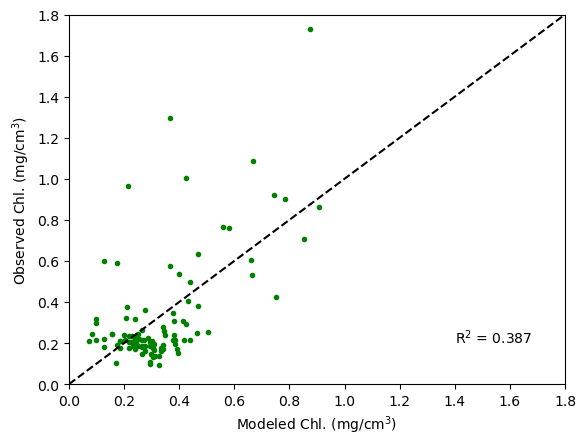

In [42]:
# plot the modeled vs observed values
plt.plot(modeled_values, chl_timeseries_subset[:,1], 'g.')

# label the x and y axis
plt.xlabel('Modeled Chl. (mg/cm$^3$)')
plt.ylabel('Observed Chl. (mg/cm$^3$)')

# add a label for the R^2
plt.text(1.4, 0.2, 'R$^2$ = ' + '{:.3f}'.format(r2))

# plot the 1-1 line
plt.plot([0, 1.8], [0, 1.8], 'k--')

# make the axes equal
plt.gca().set_xlim([0, 1.8])
plt.gca().set_ylim([0, 1.8])

# show the plot
